### Nama: Nanira Annisa Fitri
### Prodi: Matematika
### UIN Syarif Hidayatullah Jakarta

# **PREDIKSI KEMUNGKINAN TERJADINYA PENYAKIT JANTUNG**
Sebagai seorang associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung.

Akan digunakan model decision tree dan regresi logistik, untuk memprediksi
apakah seorang pasien mengidap penyakit jantung atau tidak.

**Variabel Target:**

HeartDisease: (1: heartdisease, 0: normal)

**Variabel Prediktor:**
1. Age: usia pasien
2. Sex: jenis kelamin pasien (M: Male, F: Female)
3. ChestPainType: tipe nyeri dada (TA: Typical Angina, ATA:Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
4. RestingBP: tekanan darah istirahat [mm Hg]
5. Cholesterol: serum kolesterol [mm/dl]
6. FastingBS: gula darah puasa [1 jika FastingBS > 120 mg/dl, 0 jika tidak]
7. RestingECG: hasil elektrokardiogram istirahat [Normal: Normal, ST: memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes]
8. MaxHR: detak jantung maksimum tercapai [Nilai numerik
antara 60 dan 202]
9. ExerciseAngina: N dan Y
10. Oldpeak: oldpeak ST [Nilai numerik diukur dalam depresi]
11. ST_Slope: kemiringan puncak latihan segmen ST [Up: menanjak, Flat: datar, Down: miring]

# **1. Mengumpulkan Data**

##  Load Data

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd

file_ = 'data/heart.csv'
try:
    df = pd.read_csv(file_)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    df = pd.read_csv(file_)

N, P = df.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

--2023-11-17 18:18:54--  https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35902 (35K) [text/plain]
Saving to: ‘data/heart.csv’

heart.csv           100%[===================>]  35.06K  --.-KB/s    in 0.01s   

2023-11-17 18:18:54 (2.83 MB/s) - ‘data/heart.csv’ saved [35902/35902]

baris =  918 , Kolom (jumlah variabel) =  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **2. Menelaah Data**

## 1. Menganalisis tipe data

In [2]:
df = pd.DataFrame(df)

print("DataFrame Sebelum Perubahan:")
print(df)

# Menukar nama kolom 'MaxHR' menjadi 'RestingECGBaru', dan 'RestingECG' menjadi 'MaxHRBaru'
df.rename(columns={'MaxHR': 'RestingECGBaru', 'RestingECG': 'MaxHRBaru'}, inplace=True)

print("\nDataFrame Setelah Perubahan:")
df

DataFrame Sebelum Perubahan:
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     NaN   M           ATA        140          289          0     Normal   
1    49.0   F           NAP        160          180          0     Normal   
2    37.0   M           ATA        130          283          0         ST   
3    48.0   F           ASY        138          214          0     Normal   
4    54.0   M           NAP        150          195          0     Normal   
..    ...  ..           ...        ...          ...        ...        ...   
913  45.0   M            TA        110          264          0     Normal   
914  68.0   M           ASY        144          193          1     Normal   
915  57.0   M           ASY        130          131          0     Normal   
916  57.0   F           ATA        130          236          0        LVH   
917  38.0   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  H

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Dataset terdiri dari 918 baris dan 12 kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   MaxHRBaru       918 non-null    object 
 7   RestingECGBaru  918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [4]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,MaxHRBaru,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [5]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   MaxHRBaru       918 non-null    category
 7   RestingECGBaru  918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


Variabel Sex, ChestPainType, MaxHRBaru, ExerciseAngina dan ST_Slope sebelumnya bertipe object, kemudian dilakukan pengubahan tipe menjadi kategori

In [6]:
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   MaxHRBaru       918 non-null    category
 7   RestingECGBaru  918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 43.2 KB


Variabel FastingBS dan HeartDisease berisi angka 0 dan angka 1. Angka 0 dan 1 merupakan variabel dummy dan diasumsikan sebagai kategorik sehingga variabel FastingBS dan HeartDisease diubah menjadi tipe kategori

Variabel ExerciseAngina berisi kategori N dan Y yang tidak dijelaskan dalam informasi fitur data. Diasumsikan variabel tersebut bermanfaat.

Setelah dilakukan analisis tipe data diperoleh variabel yang bertipe numerik adalah Age, RestingBP, Cholesterol, RestingECGBaru dan Oldpeak. Sedangkan variabel yang bertipe kategorik adalah Sex, ChestPainType, FastingBS, MaxHRBaru, ExerciseAngina, ST_Slope dan HeartDisease.

## 2. Menganalisis karakteristik data dengan deskripsi statistik dasar


### Check Noise via Statistika Deskriptif

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak
count,911.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,136.809368,0.887364
std,12.988393,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,177.000000,200.000000,603.000000,202.000000,6.200000


- **Age:**
Rata-rata umur pasien adalah sekitar 54 tahun dengan nilai minimum 0 dan maksimum 177.
- **RestingBP:**
Rata-rata tekanan darah istirahat adalah sekitar 132 mm Hg, dengan nilai minimum 0 dan maksimum 200 mm Hg.
- **Cholesterol:**
Rata-rata kolesterol serum adalah sekitar 199 mg/dl dengan nilai minimum 0 dan maksimum 603 mg/dl.
- **RestingECGBaru:**
Rata-rata hasil elektrokardiogram istirahat adalah sekitar 136.8 dengan nilai minimum 60 dan maksimum 202.
- **Oldpeak:**
Rata-rata depresi segmen ST adalah sekitar 0.89 dengan nilai minimum -2.6 dan maksimum 6.2.

In [8]:
# Visual Python: Data Analysis > Sweetviz
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 57.0 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


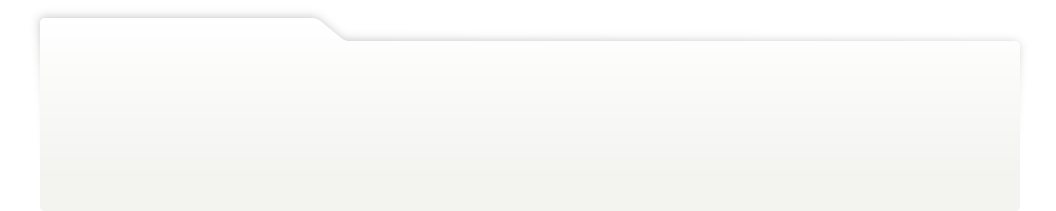
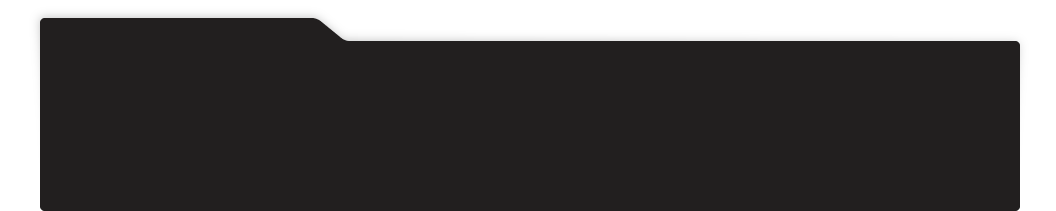
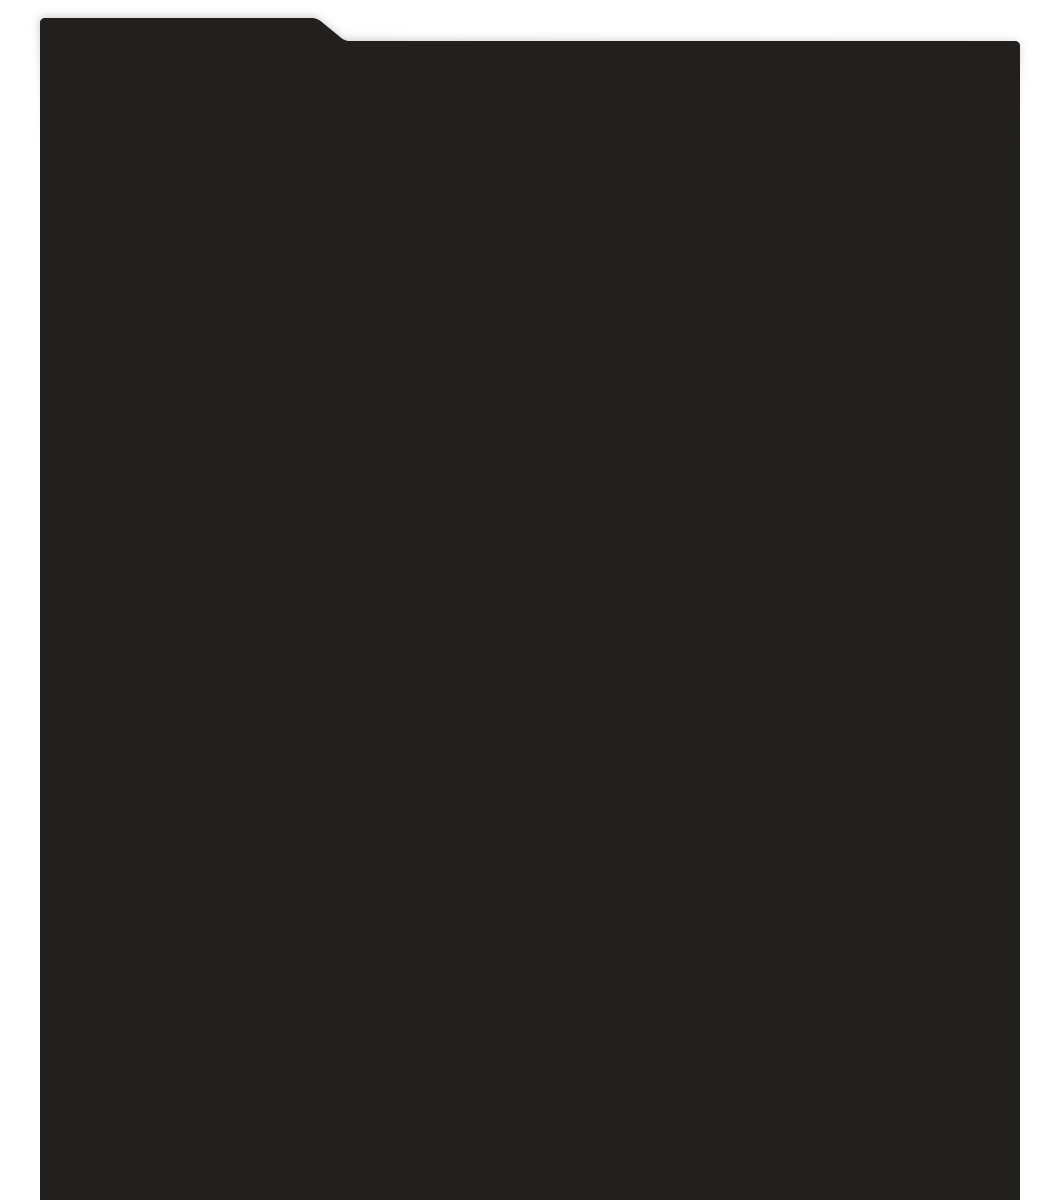
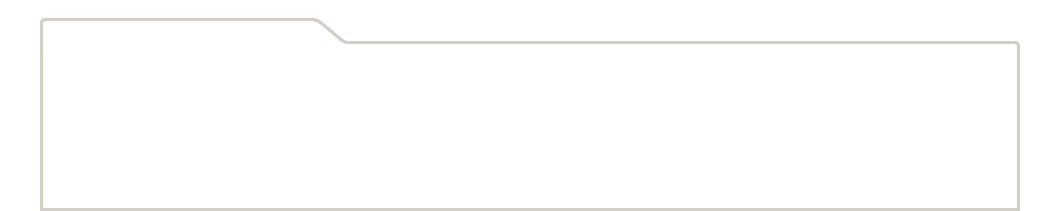
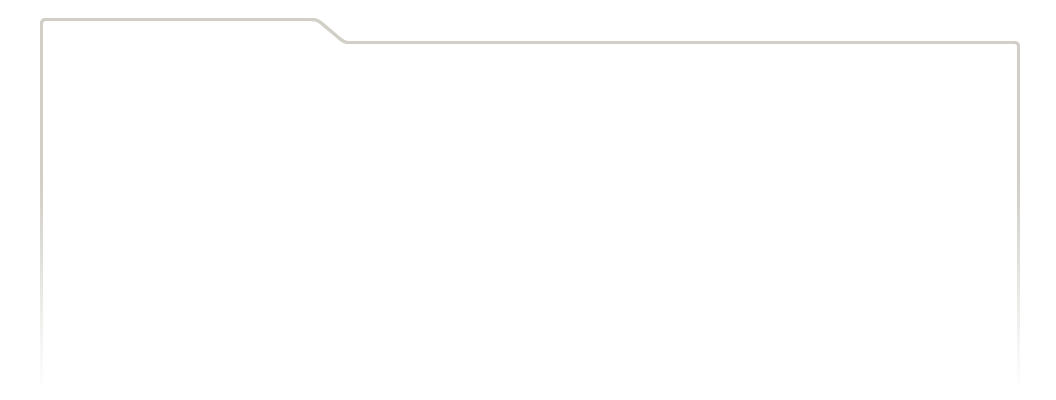
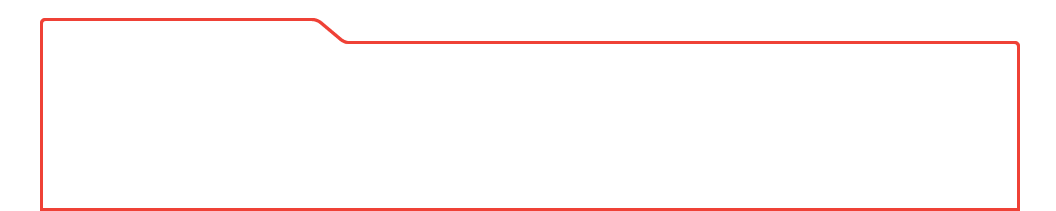
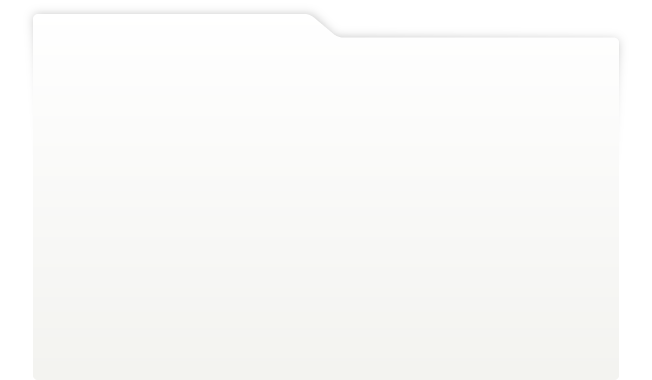
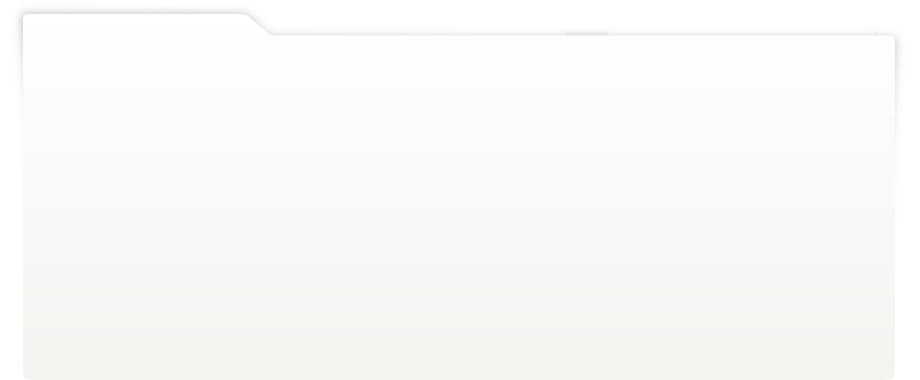
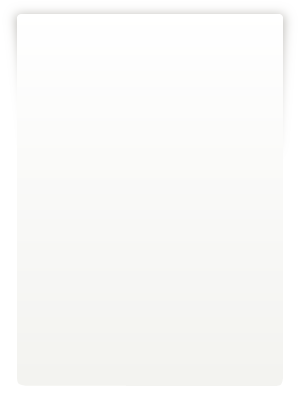
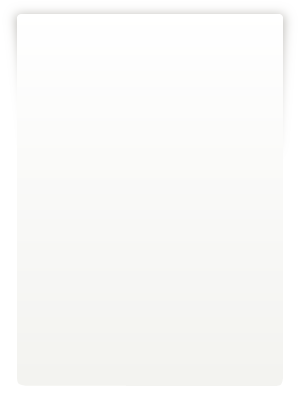
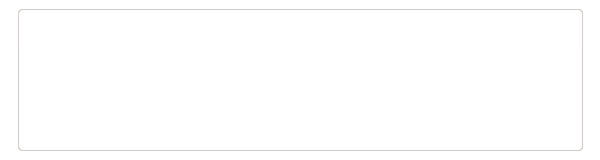
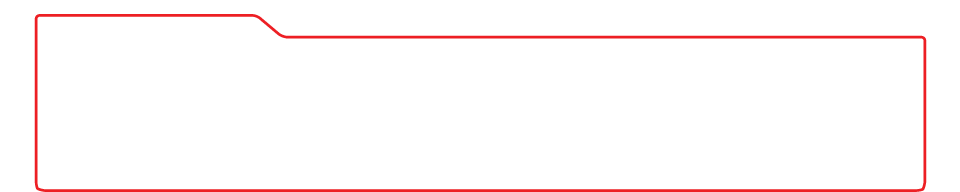
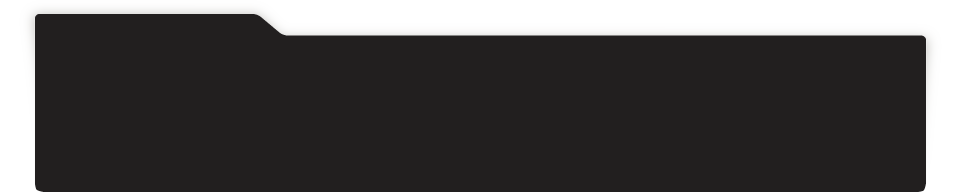
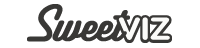
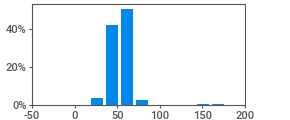
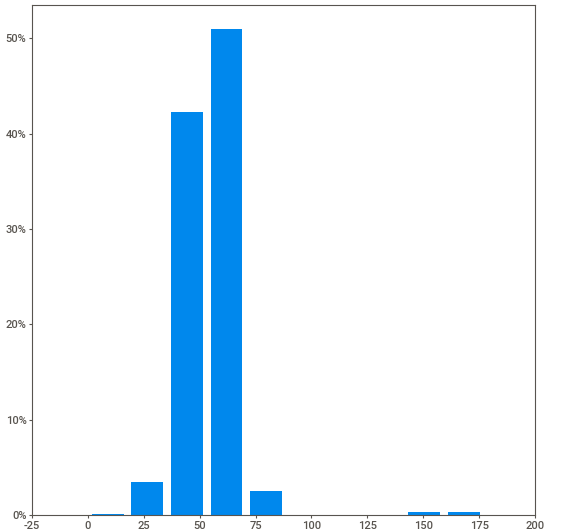
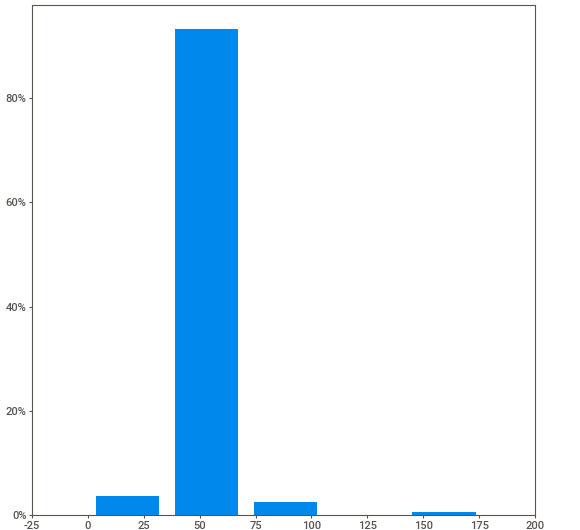
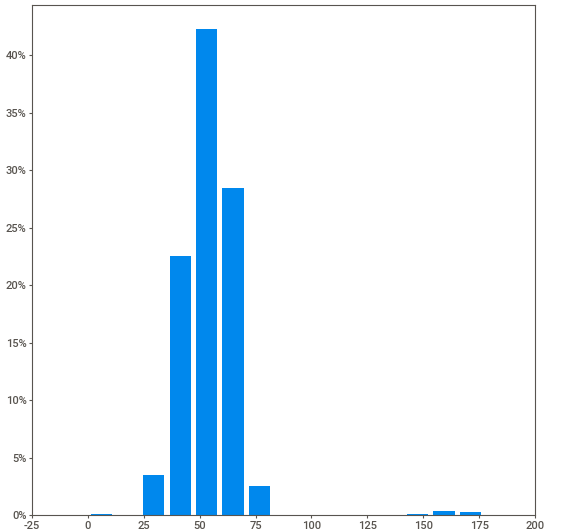
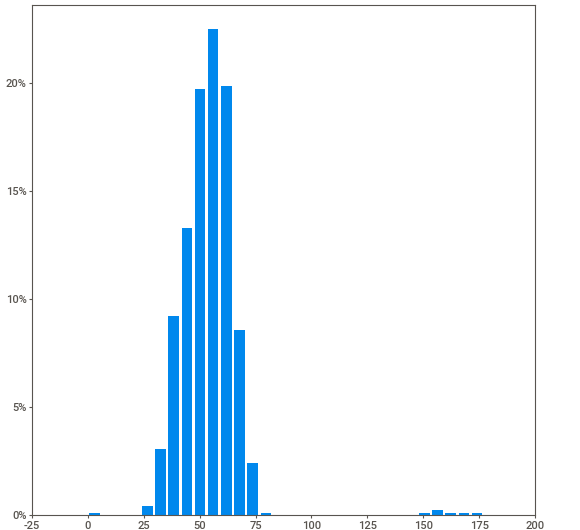
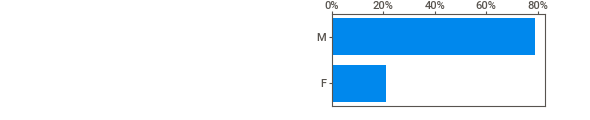
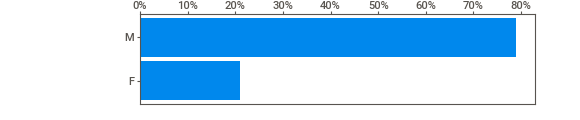
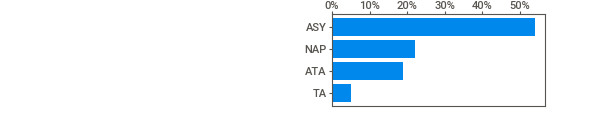
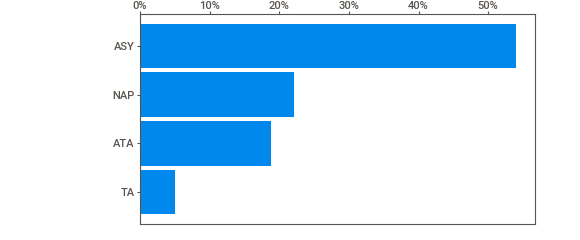
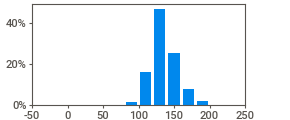
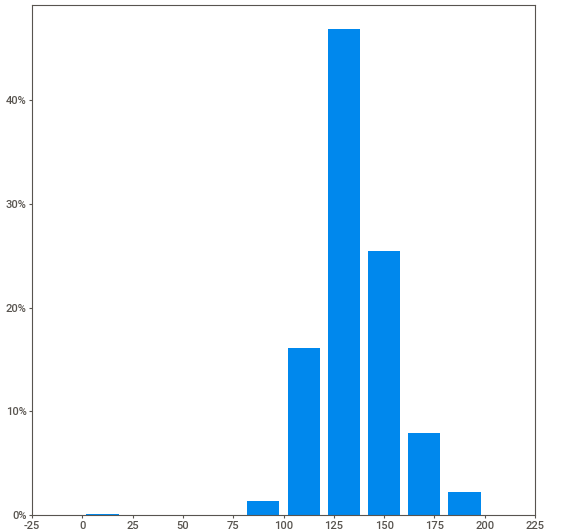
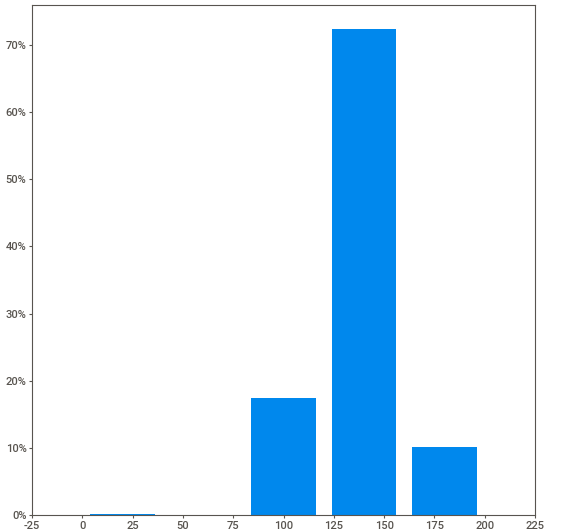
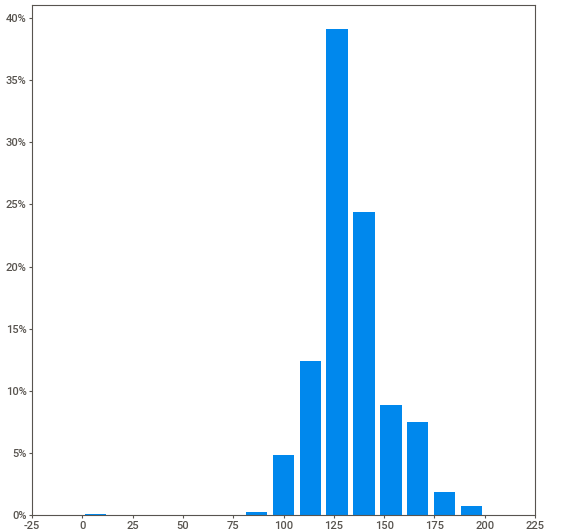
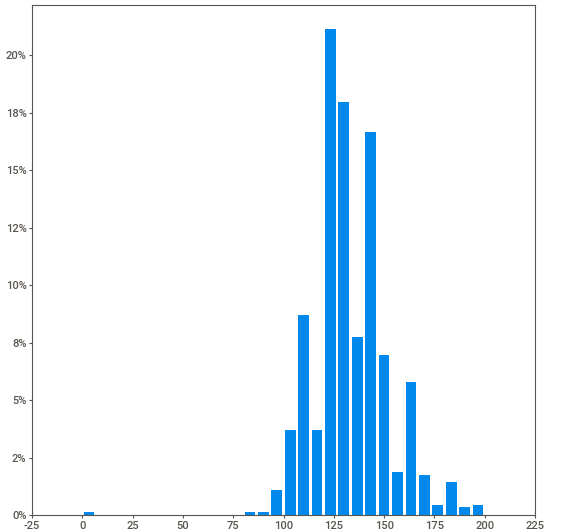
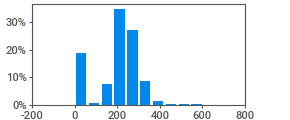
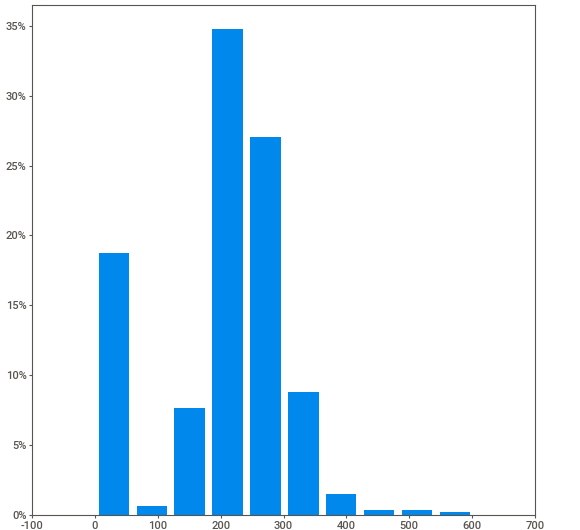
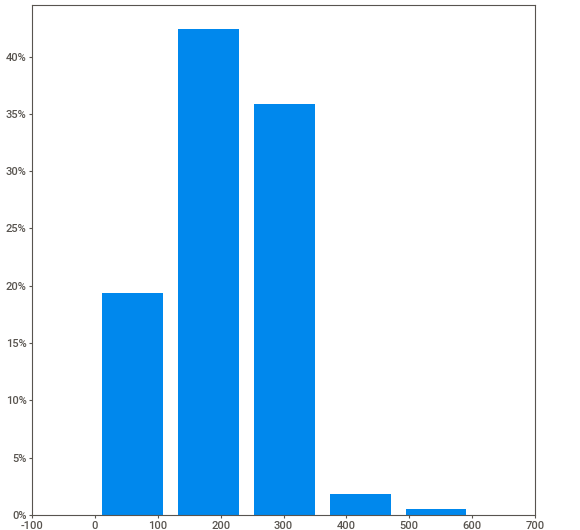
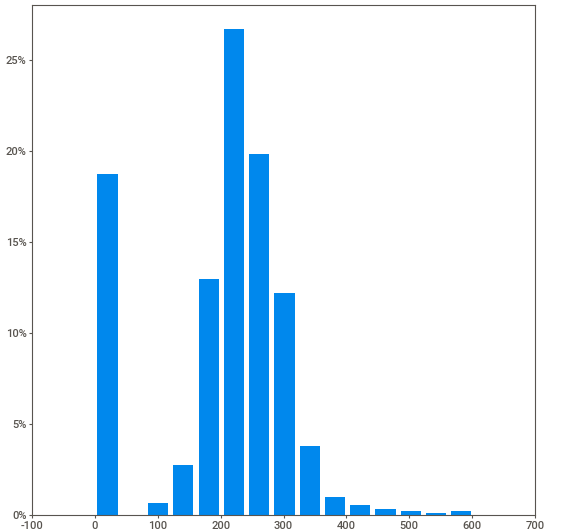
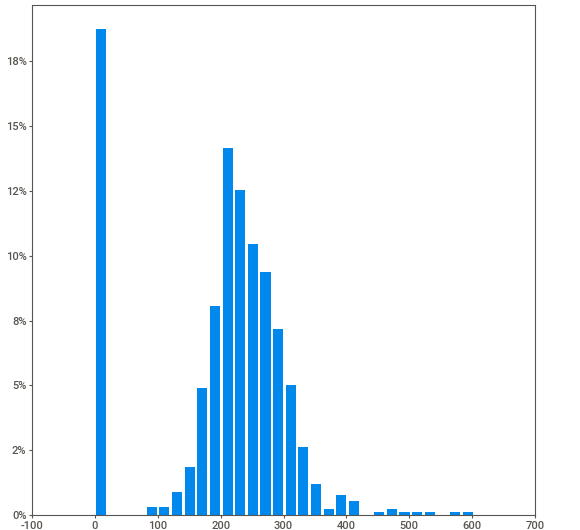
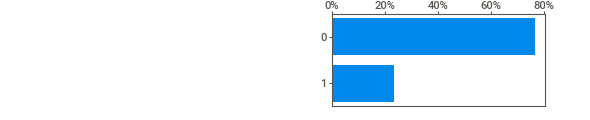
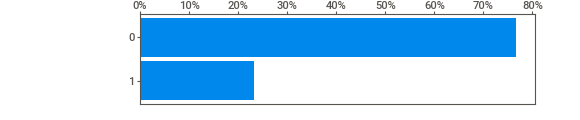
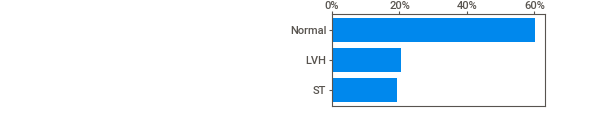
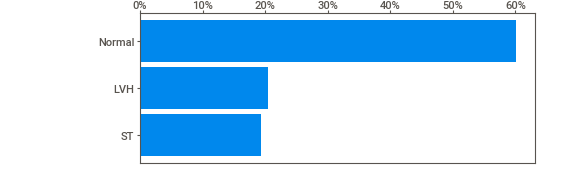
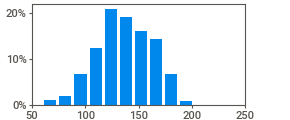
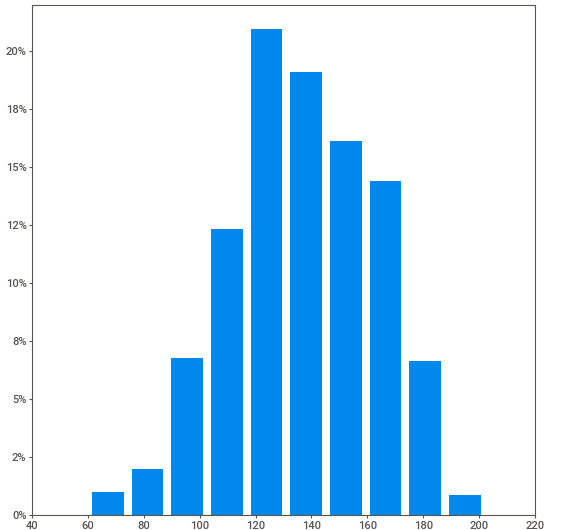
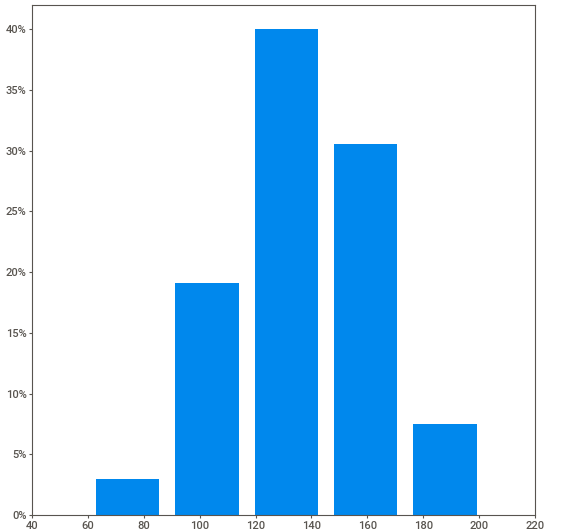
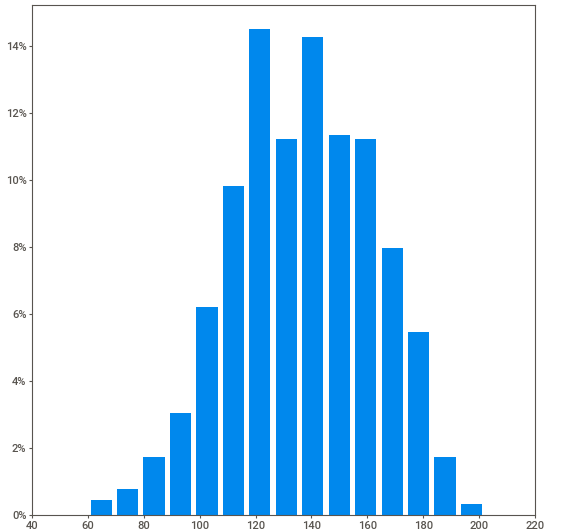
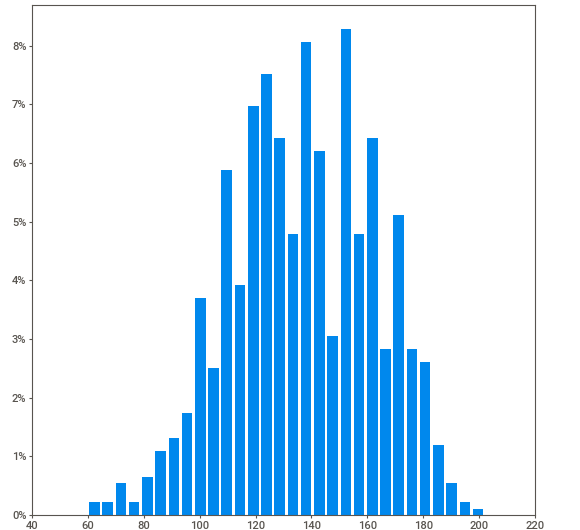
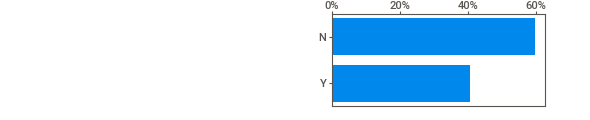
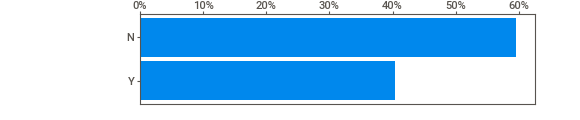
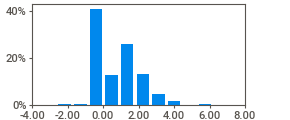
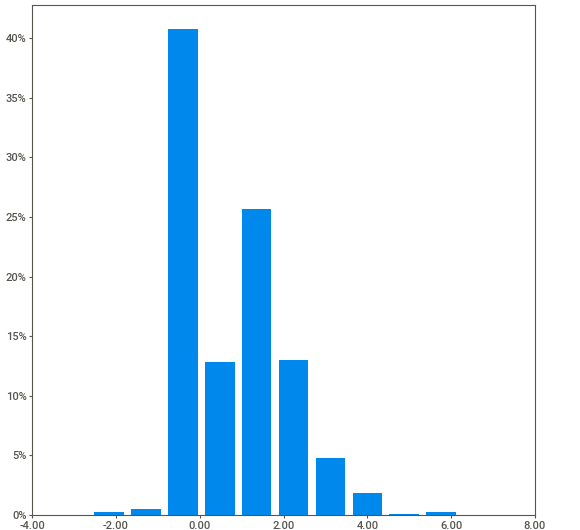
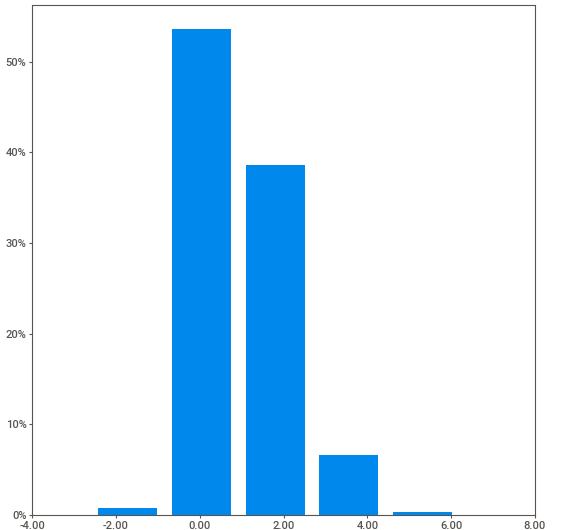
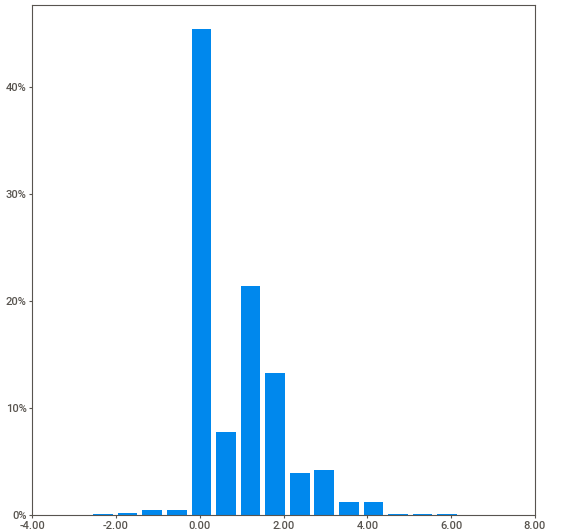
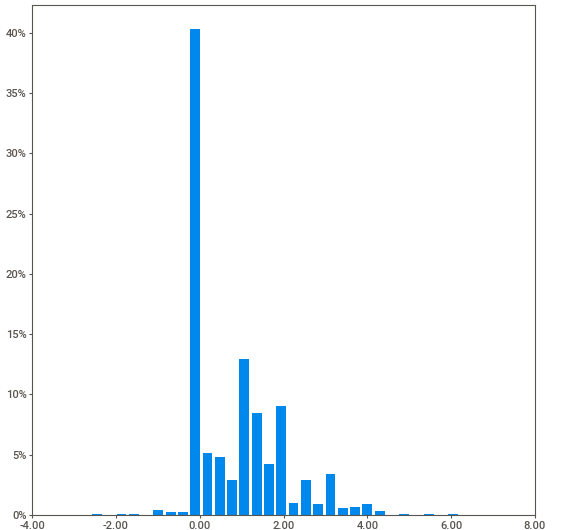
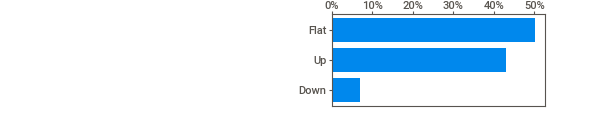
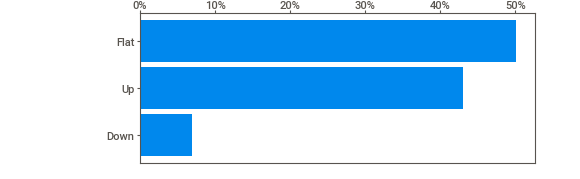
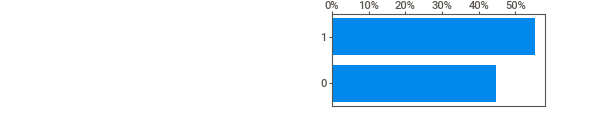
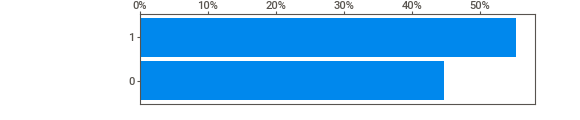
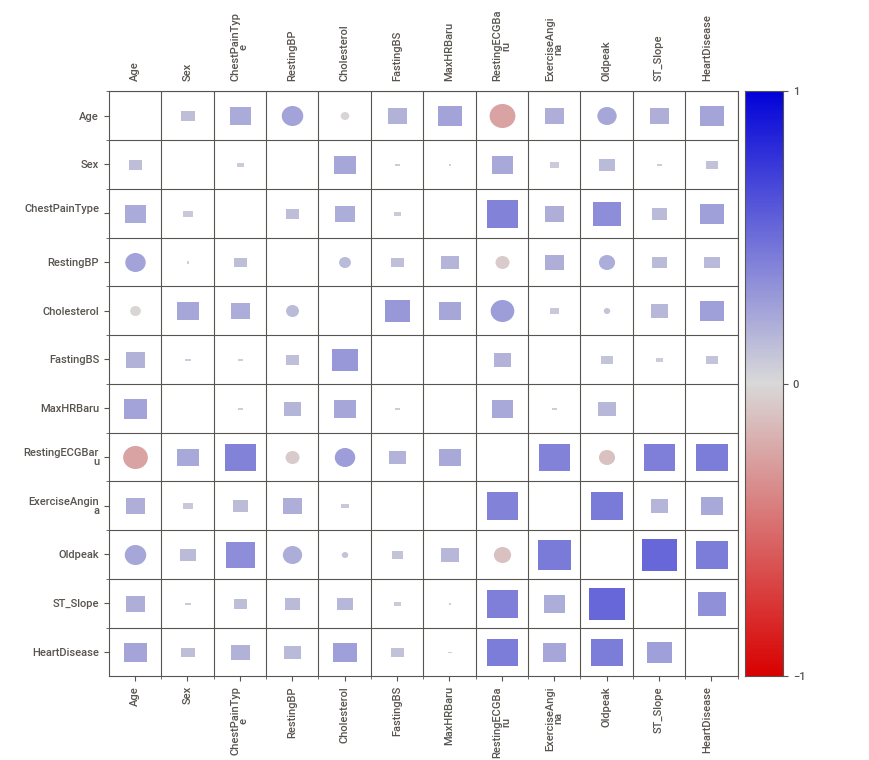
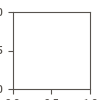

Report './.html' was saved to storage.


In [9]:
# Visual Python: Data Analysis > Sweetviz
import sweetviz
report = sweetviz.analyze([df, 'Laporan Penelaahan Data'])
report.show_notebook(filepath='./.html')
report

# **3. Memvalidasi Data**

### Check Noise pada Variabel Kategorik

In [10]:
catVar = df.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sex :  {'M', nan, 'F'}
ChestPainType :  {'NAP', 'ASY', 'TA', 'ATA'}
FastingBS :  {0, 1}
MaxHRBaru :  {'ST', 'Normal', 'LVH'}
ExerciseAngina :  {'N', 'Y'}
ST_Slope :  {'Flat', 'Down', 'Up'}
HeartDisease :  {0, 1}


Pada variabel Sex terdapat "nan". Diasumsikan hal tersebut adalah missing value.

### Check Noise di Variabel Numerik

In [11]:
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

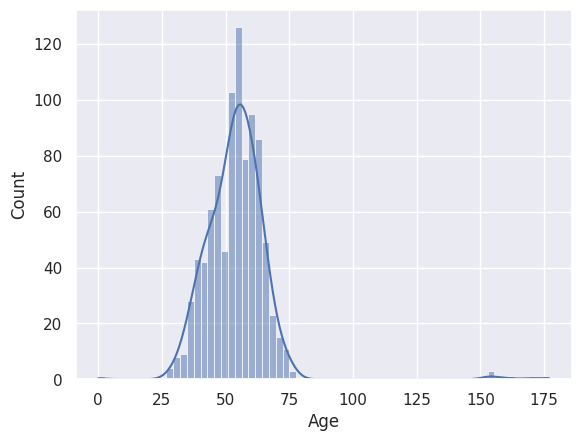

,Age
count,911.000000
mean,54.102086
std,12.988393
min,0.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,177.000000


In [12]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Age', kde=True)
plt.show()
df[['Age']].describe()

Dari hasil di atas, dapat dilihat bahwa pada variabel Age terdapat sedikit outlier yaitu umur pasien lebih dari 150 tahun.

In [13]:
df["Age"].unique()

array([ nan,  49.,  37.,  48.,  54.,  39.,  45.,  58.,  42.,  38.,  43.,
        60.,  36.,  44.,  40.,  53.,  52.,  51.,  56.,  41.,  32.,  65.,
        35.,  59.,  50.,  47.,  31.,  46.,  57., 155.,  55.,  63.,  66.,
        34.,  33.,  61.,  29.,  62.,  28.,  30.,  74.,  68.,   0.,  72.,
        64.,  69.,  67.,  73.,  70., 161., 177.,  75.,  76.,  71., 153.,
       170., 154.,  77.])

Berdasarkan nilai di atas, terdapat outlier yaitu pasien dengan usia 0, 153,
154, 155, 161, 170 dan 177. Diasumsikan bahwa ini merupakan noise dan akan dilakukan drop baris.


In [14]:
df.drop(df[df['Age'] == 0].index, inplace=True)
df.drop(df[df['Age'] == 153.].index, inplace=True)
df.drop(df[df['Age'] == 154.].index, inplace=True)
df.drop(df[df['Age'] == 155.].index, inplace=True)
df.drop(df[df['Age'] == 161.].index, inplace=True)
df.drop(df[df['Age'] == 170.].index, inplace=True)
df.drop(df[df['Age'] == 177.].index, inplace=True)
print(df.shape)
df.head(5)

(911, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


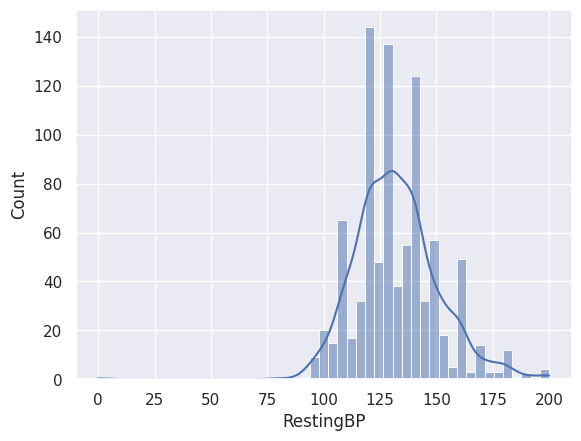

,RestingBP
count,911.000000
mean,132.342481
std,18.537314
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [15]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='RestingBP', kde=True)
plt.show()
df[['RestingBP']].describe()

Berdasarkan hasil di atas dapat dilihat bahwa histogram cenderung berdistribusi normal.

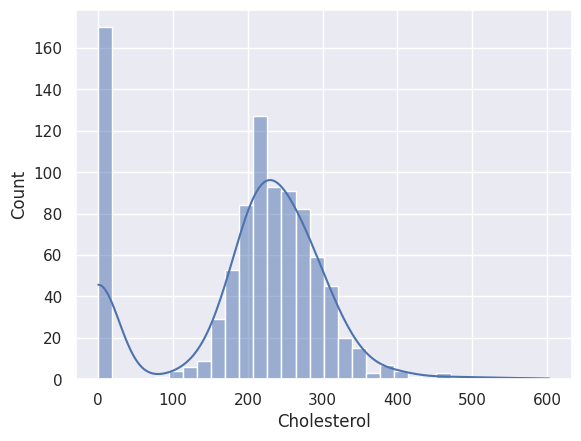

,Cholesterol
count,911.000000
mean,199.036224
std,109.342489
min,0.000000
25%,174.500000
50%,223.000000
75%,267.000000
max,603.000000


In [16]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Cholesterol', kde=True)
plt.show()
df[['Cholesterol']].describe()

Terdapat pasien yang memiliki serum kolesterol sebesar 0 mm/hg dan ada juga sebesar 603 mm/hg.
* Untuk serum kolesterol sebesar 0 mm/hg diasumsikan bahwa tidak ada orang yang memiliki kadar serum kolesterol sebesar 0 mm/hg. Diasumsikan bahwa hal tersebut merupakan noise dan akan dilakukan drop baris.
* Untuk serum kolesterol sebesar maksimal 603 mm/hg diasumsikan bahwa ada orang yang memiliki kadar serum kolesterol sebesar 603 mm/hg




In [17]:
df = df.drop(df[df['Cholesterol']<40].index)
print(df.shape)
df.head(5)

(741, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


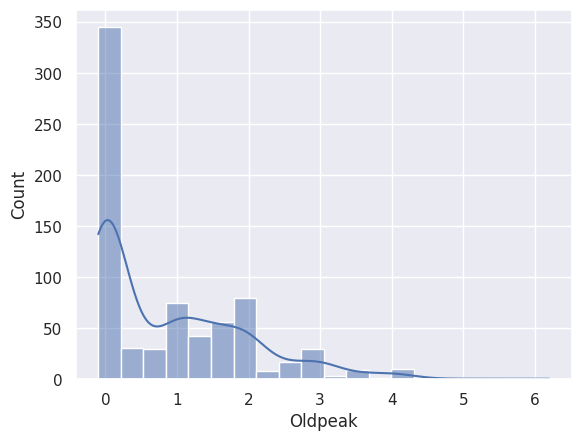

,Oldpeak
count,741.000000
mean,0.900000
std,1.073413
min,-0.100000
25%,0.000000
50%,0.500000
75%,1.500000
max,6.200000


In [18]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Oldpeak', kde=True)
plt.show()
df[['Oldpeak']].describe()

Berdasarkan grafik di atas, dapat dilihat terdapat outlier yaitu pasien dengan Oldpeak kurang dari 0. Hal tersebut diasumsikan bahwa tidak ada orang yang memiliki oldpeak kurang dari 0. Diasumsikan bahwa hal tersebut merupakan noise dan akan dilakukan drop baris.

In [19]:
df = df.drop(df[df['Oldpeak']<0].index)
print(df.shape)
df.head(5)

(740, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Check Duplikasi Data

In [20]:
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True]

(740, 12)
jumlah data yang duplikat 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Tidak terdapat duplikasi pada data ini

## Memeriksa Outlier

### Distribusi Variabel Kategorik

In [21]:
import numpy as np

In [22]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

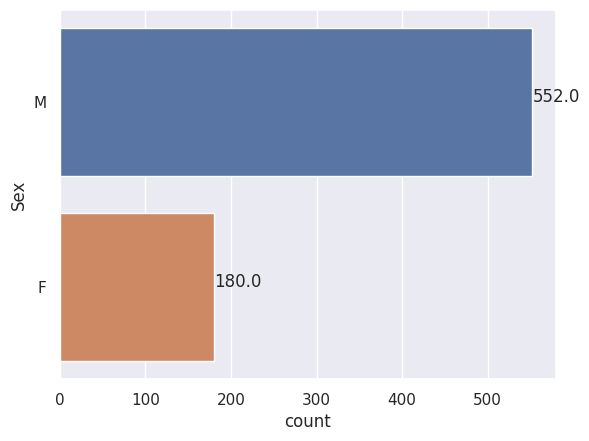

In [23]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='Sex', order=df['Sex'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan pasien yang menderita penyakit jantung berjenis kelamin pria. Pada dataset yang digunakan, proporsi pasien pria yang memiliki heart disease jumlahnya lebih tinggi dibandingkan dengan pasien perempuan

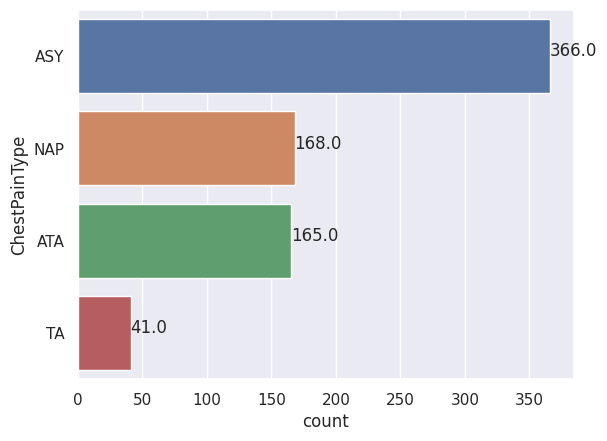

In [24]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='ChestPainType', order=df['ChestPainType'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas pasien yang menderita penyakit jantung mengalami tipe nyeri dada Angina Pectoris (ASY)

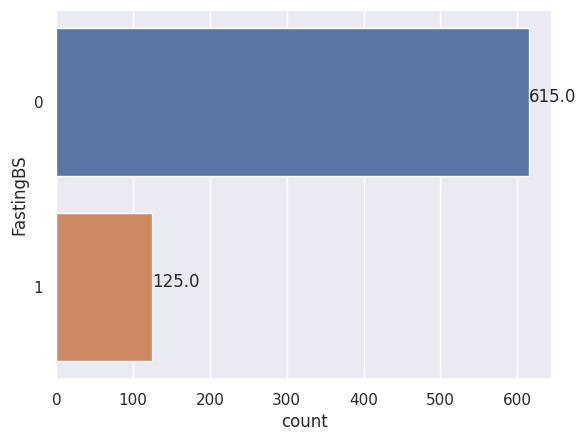

In [25]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='FastingBS')
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas pasien yang menderita penyakit jantung memiliki gula darah puasa kurang dari 120 mg/dl. Hal ini diasumsikan valid karena berdasarkan domain knowledge pasien dinilai normal jika masih di bawah 100 mg/dl.

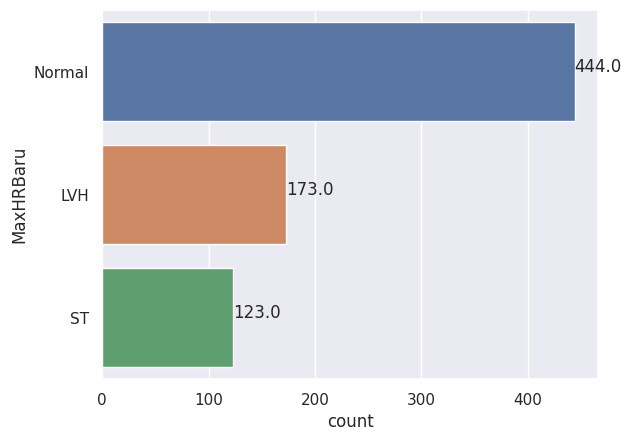

In [26]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='MaxHRBaru', order=df['MaxHRBaru'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas detak jantung maksimum tercapai dari pasien yang menderita penyakit jantung adalah normal.

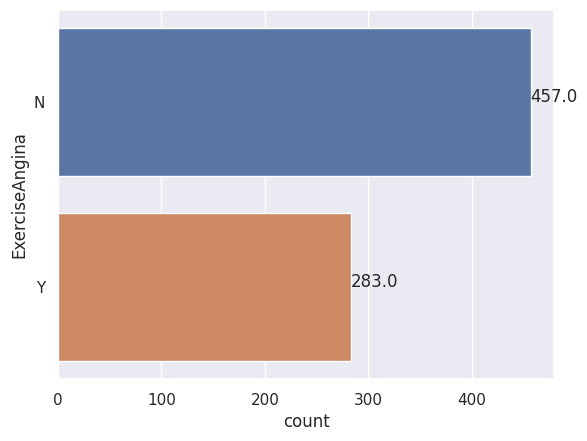

In [27]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='ExerciseAngina', order=df['ExerciseAngina'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas dari pasien yang menderita penyakit jantung adalah N.

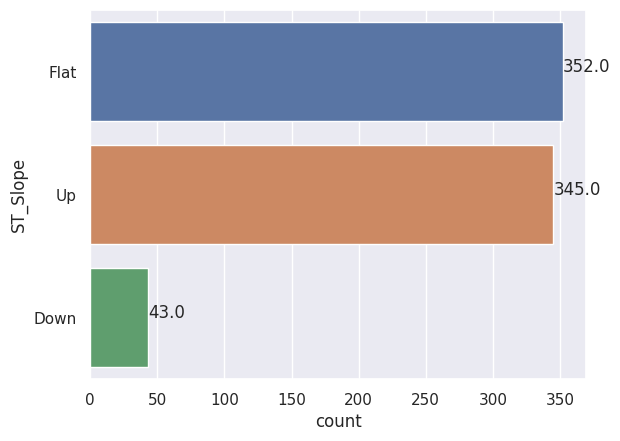

In [28]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='ST_Slope', order=df['ST_Slope'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Hasil dari plot di atas menunjukkan bahwa kecenderungan mayoritas kemiringan puncak latihan segmen ST dari pasien yang menderita penyakit jantung adalah Flat.

# **4. Menentukan Objek Data**

### Distribusi Variabel Numerik

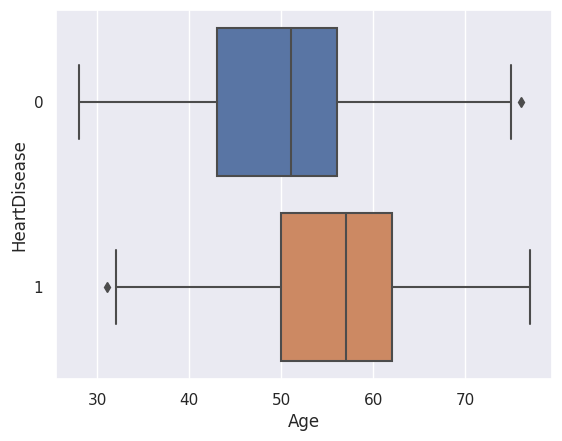

In [29]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='Age', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat outlier. Akan tetapi, outlier tersebut tidak terlalu banyak sehingga diasumsikan bahwa outlier tersebut normal ada pada data.

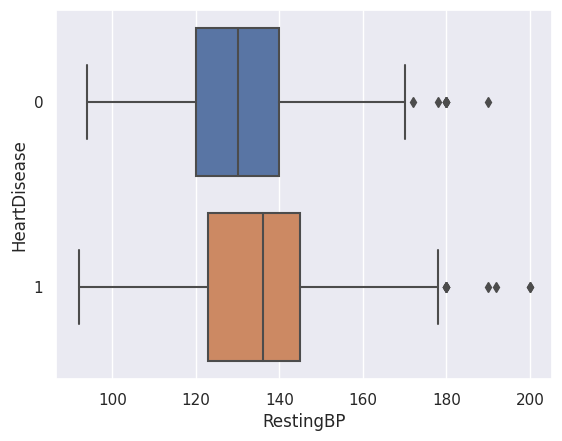

In [30]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='RestingBP', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat outlier yang cukup banyak. Outlier dapat memengaruhi hasil analisis secara keseluruhan. Oleh karena itu, diperlukan penanganan untuk mengatasi outlier dengan melakukan proses filtering.

Q1=120.0, Q3=140.0, IQR=20.0


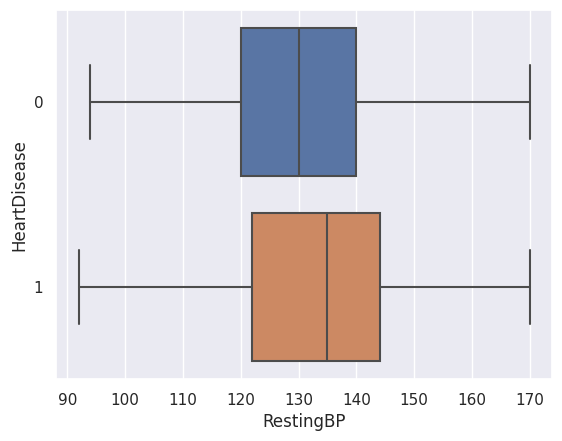

((720, 12), (740, 12))

In [31]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.RestingBP < Q1-1.5*IQR) | (df.RestingBP > Q3+1.5*IQR)].index)
p = sns.boxplot(x="RestingBP", y="HeartDisease", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

Setelah menerapkan proses filtering pada data, terlihat bahwa kecenderungan outlier yang sebelumnya ada pada data telah dihilangkan.

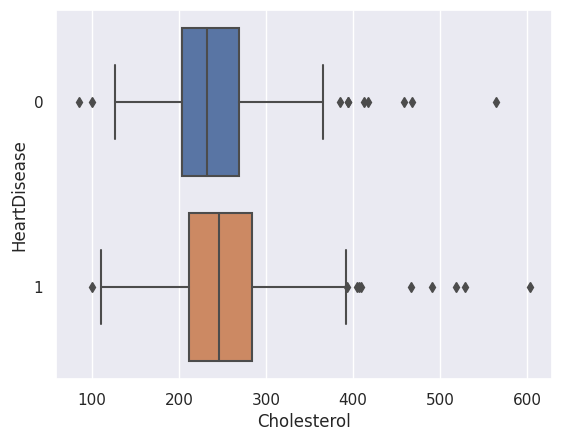

In [32]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='Cholesterol', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat outlier yang cukup banyak. Outlier dapat memengaruhi hasil analisis secara keseluruhan. Oleh karena itu, diperlukan penanganan untuk mengatasi outlier dengan melakukan proses filtering.

Q1=207.75, Q3=275.25, IQR=67.5


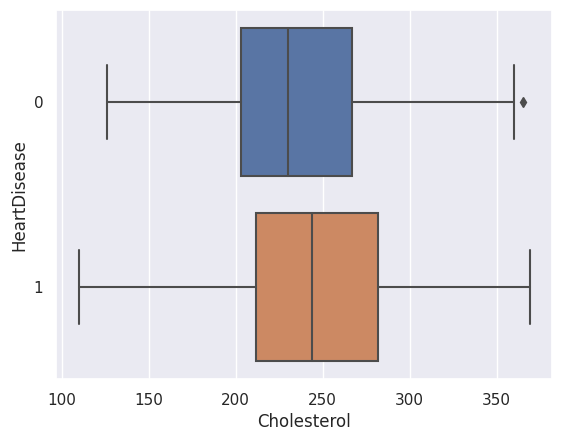

((717, 12), (740, 12))

In [33]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.Cholesterol < Q1-1.5*IQR) | (df.Cholesterol > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Cholesterol", y="HeartDisease", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

Setelah menerapkan proses filtering pada data, terlihat bahwa kecenderungan outlier yang sebelumnya ada pada data telah berkurang.

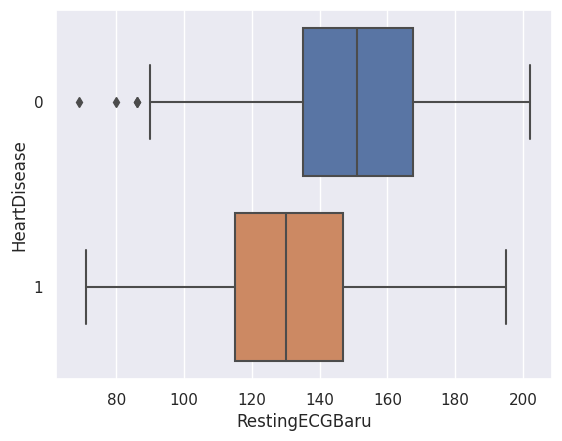

In [34]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='RestingECGBaru', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat outlier yang cukup banyak. Outlier dapat memengaruhi hasil analisis secara keseluruhan. Oleh karena itu, diperlukan penanganan untuk mengatasi outlier dengan melakukan proses filtering.

Q1=122.0, Q3=160.0, IQR=38.0


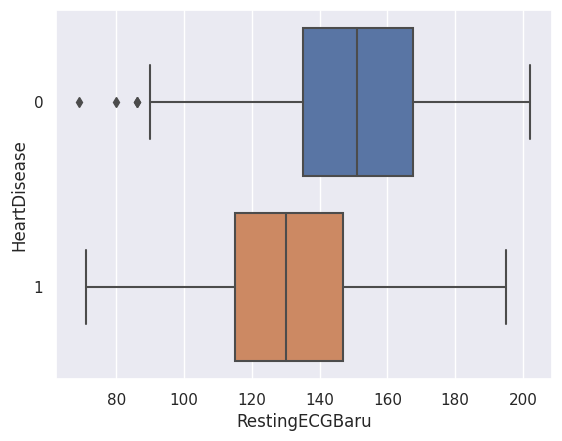

((740, 12), (740, 12))

In [35]:
Q1 = df['RestingECGBaru'].quantile(0.25)
Q3 = df['RestingECGBaru'].quantile(0.75)
IQR = Q3 - Q1
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.RestingECGBaru < Q1-1.5*IQR) | (df.RestingECGBaru > Q3+1.5*IQR)].index)
p = sns.boxplot(x="RestingECGBaru", y="HeartDisease", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

Setelah melakukan proses filtering data, outlier cenderung tetap ada sehingga diasumsikan bahwa outlier tersebut normal ada pada data.

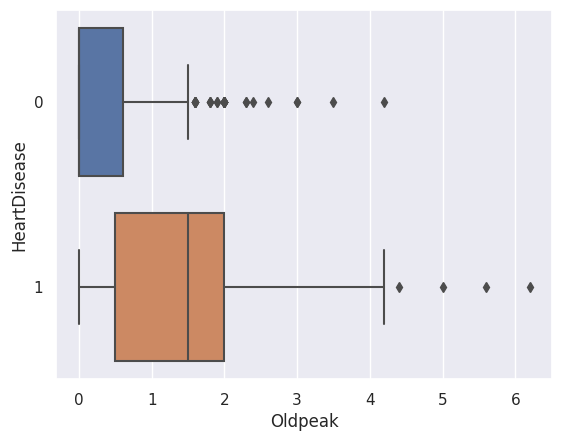

In [36]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=df, x='Oldpeak', y='HeartDisease')
plt.show()

Dari hasil boxplot di atas terdapat outlier yang cukup banyak. Outlier dapat memengaruhi hasil analisis secara keseluruhan. Oleh karena itu, diperlukan penanganan untuk mengatasi outlier dengan melakukan proses filtering.

Q1=0.0, Q3=1.5, IQR=1.5


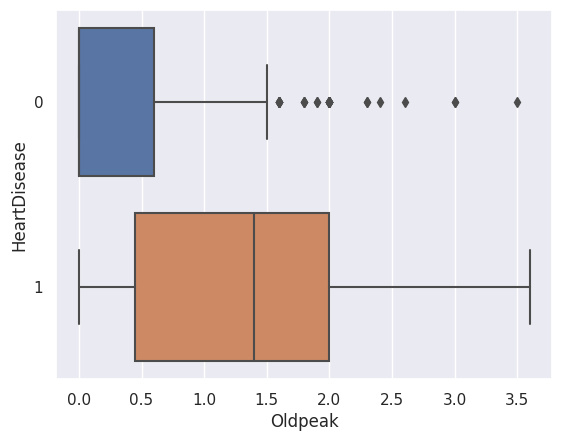

((725, 12), (740, 12))

In [37]:
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.Oldpeak < Q1-1.5*IQR) | (df.Oldpeak > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Oldpeak", y="HeartDisease", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

Setelah menerapkan proses filtering pada data, terlihat bahwa kecenderungan outlier yang sebelumnya ada pada data telah berkurang.

# **5. Membersihkan Data**

## Missing Value

In [38]:
print(df.isnull().sum())

Age               7
Sex               8
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHRBaru         0
RestingECGBaru    0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [39]:
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Age,0.945946
Sex,1.081081
ChestPainType,0.000000
RestingBP,0.000000
Cholesterol,0.000000
FastingBS,0.000000
MaxHRBaru,0.000000
RestingECGBaru,0.000000
ExerciseAngina,0.000000
Oldpeak,0.000000


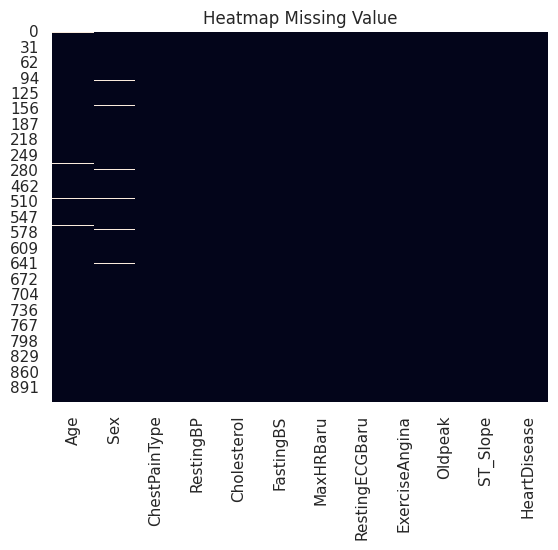

In [40]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Terdapat missing value pada variabel Age sebanyak 7 dan variabel Sex sebanyak 8. Agar dapat memastikan keakuratan dalam analisis data, akan dilakukan penghapusan missing value dari data dengan cara menghapus baris yang mengandung missing value.

In [41]:
X = df.dropna()
print(df.shape, X.shape)
X.head()

(740, 12) (726, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [42]:
print(X.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHRBaru         0
RestingECGBaru    0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Setelah dilakukan penghapusan missing value menggunakan fungsi dropna(), terlihat sudah tidak ada missing value pada data. Proses ini penting dilakukan agar interpretasi hasil analisis menjadi lebih lengkap.

# **6. Mengkonstruksi Data**

## Transformasi Data
### One-Hot Encoding

Untuk meningkatkan kemampuan model dalam mengolah dan menganalisis data kategorik, akan dilakukan transformasi data menggunakan teknik One-Hot Encoding.

In [43]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHRBaru,RestingECGBaru,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [44]:
print(X.shape)
for col in catVar.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(X[col], prefix='')
        X = pd.concat([X, transformasi], axis = 1)
        try:
            X.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(X.shape)
X.head()

(726, 12)
(726, 22)


,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48.0,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54.0,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120,339,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 1 to 917
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             726 non-null    float64 
 1   RestingBP       726 non-null    int64   
 2   Cholesterol     726 non-null    int64   
 3   RestingECGBaru  726 non-null    int64   
 4   Oldpeak         726 non-null    float64 
 5   HeartDisease    726 non-null    category
 6   _F              726 non-null    uint8   
 7   _M              726 non-null    uint8   
 8   _ASY            726 non-null    uint8   
 9   _ATA            726 non-null    uint8   
 10  _NAP            726 non-null    uint8   
 11  _TA             726 non-null    uint8   
 12  _0              726 non-null    uint8   
 13  _1              726 non-null    uint8   
 14  _LVH            726 non-null    uint8   
 15  _Normal         726 non-null    uint8   
 16  _ST             726 non-null    uint8   
 17  _N              

Proses One-Hot Encoding ini berguna agar model dapat lebih efisien menangkap pola-pola yang terdapat dalam data dan meningkatkan kinerja model serta menghasilkan hasil yang lebih akurat.

## Menyimpan Hasil Preprocessed Data

In [46]:
# Saving the preprocessed Data for future use/analysis
X.to_csv("data/heart_PreProcessed.csv", encoding='utf8', index=False)

# **7. Menentukan Label Data**

Load data yang sudah dilakukan telaah data

In [47]:
file_ = 'data/heart_PreProcessed.csv'
df2 = pd.read_csv(file_)

N, P = df2.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df2

baris =  726 , Kolom (jumlah variabel) =  22


,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,49.0,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,37.0,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
2,48.0,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,54.0,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4,39.0,120,339,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,45.0,110,264,132,1.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
722,68.0,144,193,141,3.4,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
723,57.0,130,131,115,1.2,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
724,57.0,130,236,174,0.0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             726 non-null    float64
 1   RestingBP       726 non-null    int64  
 2   Cholesterol     726 non-null    int64  
 3   RestingECGBaru  726 non-null    int64  
 4   Oldpeak         726 non-null    float64
 5   HeartDisease    726 non-null    int64  
 6   _F              726 non-null    int64  
 7   _M              726 non-null    int64  
 8   _ASY            726 non-null    int64  
 9   _ATA            726 non-null    int64  
 10  _NAP            726 non-null    int64  
 11  _TA             726 non-null    int64  
 12  _0              726 non-null    int64  
 13  _1              726 non-null    int64  
 14  _LVH            726 non-null    int64  
 15  _Normal         726 non-null    int64  
 16  _ST             726 non-null    int64  
 17  _N              726 non-null    int

Setelah dilakukan transformasi menggunakan One-Hot Encoding, jumlah baris pada data ada sebanyak 726 baris dan jumlah kolom (jumlah variabel) ada sebanyak 22 variabel.

## Train dan Test Data

In [49]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [50]:
predictor = df2.loc[:, ~df2.columns.isin(['HeartDisease'])]
target = df2['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(508, 21) (508,)
(218, 21) (218,)


Akan dilakukan pemisahan dataset menjadi dua bagian yaitu data pelatihan (train data) dan data pengujian (test data).

Data train digunakan untuk membuat model yang optimal dan data test digunakan untuk mengevaluasi dari model optimal.

Rasio yang digunakan pada data ini yaitu data train sebesar 70% dan data test sebesar 30%.

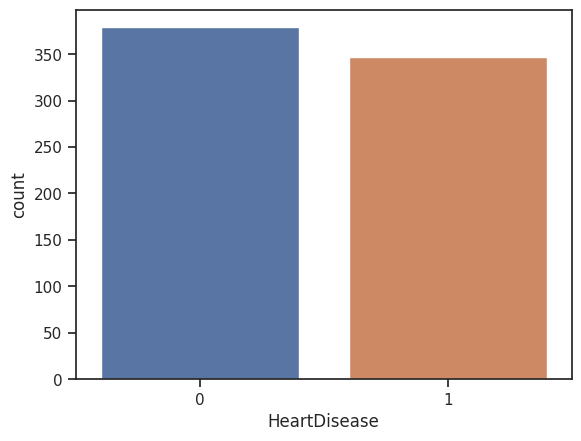

Counter({0: 379, 1: 347})


In [51]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df2, x='HeartDisease')
plt.show()

D = Counter(df2['HeartDisease'])
print(D)

Dari hasil countplot di atas, sebagian besar pasien cenderung masuk ke dalam kategori pasien yang normal. Meskipun demikian, terlihat bahwa jumlah pasien yang mengalami penyakit jantung juga cukup signifikan, tidak terlalu berbeda jauh dari jumlah pasien normal.

# **8. Membangun Model**

## Model Regresi Logistik

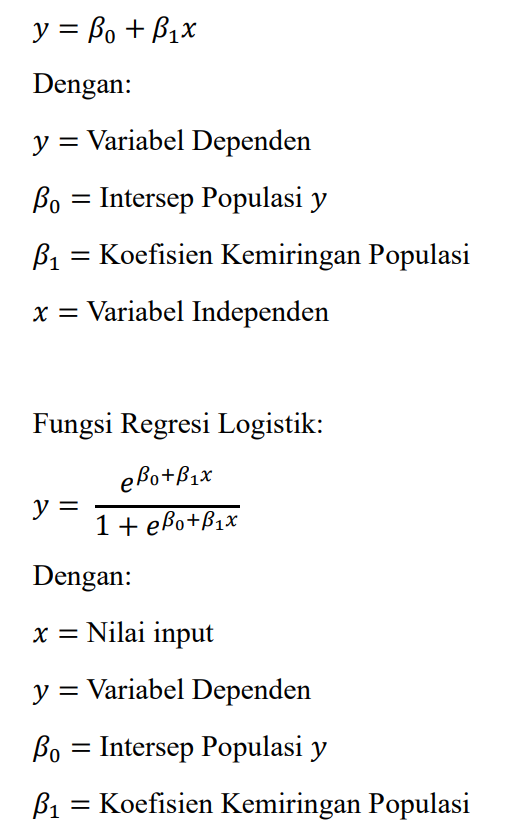

### Membuat Model Regresi Logistik

In [52]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[105  17]
 [ 11  85]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       122
           1       0.83      0.89      0.86        96

    accuracy                           0.87       218
   macro avg       0.87      0.87      0.87       218
weighted avg       0.87      0.87      0.87       218



Text(53.75, 0.5, 'Truth')

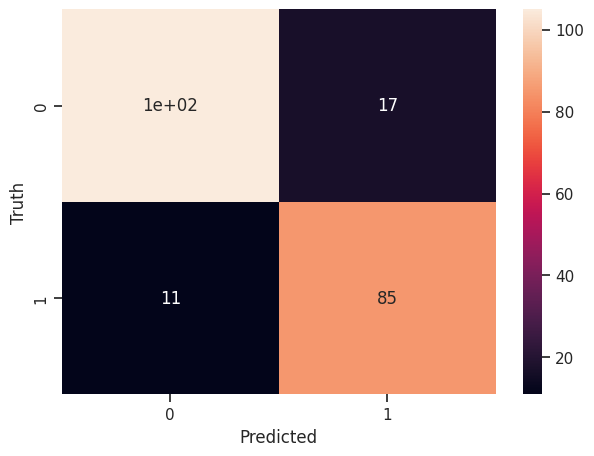

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
# visualisasi confusion matrix
cm = confusion_matrix(yTest, prediksi_regLog)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Interpretasi:

Confusion matrix:
- pasien yang normal dan diprediksi normal oleh model test data ada 105 pasien
- pasien yang normal dan diprediksi memiliki penyakit jantung oleh model test data ada 17 pasien
- pasien dengan penyakit jantung dan diprediksi normal oleh model test data ada 11 pasien
- pasien dengan penyakit jantung dan diprediksi memiliki penyakit jantung oleh model test data ada 85 pasien


Presisi:
-  Presisi (Precision) adalah salah satu metrik evaluasi kinerja model klasifikasi yang mengukur sejauh mana model dapat mengenali dengan benar kelas positif dari prediksi positif yang dibuat.
 - nilai presisi kategori 0 (normal) sebesar 0.91, artinya sekitar 91% dari prediksi dibuat oleh model adalah benar, sedangkan sekitar 9% merupakan prediksi positif palsu.
 - nilai presisi kategori 1 (penyakit jantung) sebesar 0.83, artinya sekitar 83% dari prediksi dibuat oleh model adalah benar, sedangkan sekitar 17% merupakan prediksi positif palsu.

Recall:
- Recall adalah metrik evaluasi kinerja model klasifikasi yang mengukur seberapa baik model dapat mengenali atau mendeteksi semua instance yang seharusnya termasuk dalam kelas positif.  
 - Hasil recall pada kategori 0 (normal) sebesar 86% berarti bahwa model memiliki kecenderungan yang rendah untuk salah dalam mengklasifikasikan pasien yang seharusnya normal.
 - Hasil recall pada kategori 1 (penyakit jantung) sebesar 89% berarti bahwa model memiliki kecenderungan yang rendah untuk salah dalam mengklasifikasikan pasien yang seharusnya memiliki penyakit jantung.

F1-Score:
- F1-Score adalah metrik evaluasi berguna untuk melihat keseimbangan antara kemampuan model dalam mengidentifikasi instance positif (recall) dan meminimalkan kesalahan prediksi positif palsu (presisi).
- F1-Score memiliki rentang nilai antara 0 dan 1, di mana nilai 1 menunjukkan kinerja model sempurna dan nilai 0 menunjukkan kinerja model buruk.
 - Hasil f1 score kategori 0 (normal) sebesar 88% artinya kecenderungan kinerja model mendekati sempurna.
 - Hasil f1 score kategori 1 (penyakit jantung) sebesar 86% artinya kecenderungan kinerja model mendekati sempurna.

In [54]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.86 (+/- 0.11), Waktu = 1.169 detik


Akurasi mengukur sejauh mana model dapat mengklasifikasikan data dengan benar, baik sebagai kelas positif maupun negatif.

Hasil akurasi model regresi logistik sebesar 86% dengan standar deviasi sebesar 0.11. Hal ini menunjukkan bahwa model mampu memprediksi data dengan 86% prediksi sesuai dengan nilai sebenarnya.

RegLog    0.763889
dtype: float64

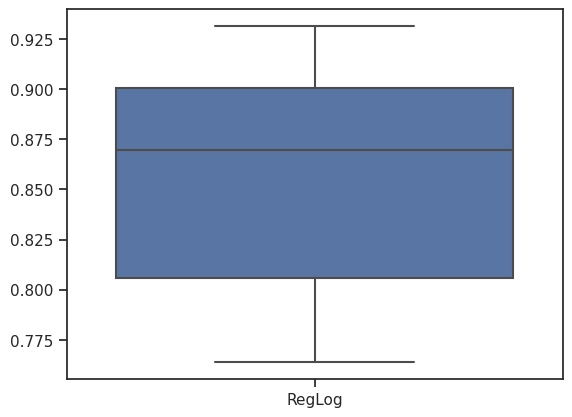

In [55]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

Dapat dilihat dari hasil boxplot di atas bahwa hasil skor model regresi logistik sebesar 0.763889.

## Model Decision Tree

In [56]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[92 30]
 [15 81]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       122
           1       0.73      0.84      0.78        96

    accuracy                           0.79       218
   macro avg       0.79      0.80      0.79       218
weighted avg       0.80      0.79      0.79       218



Interpretasi:

Confusion matrix:
- pasien yang normal dan diprediksi normal oleh model test data ada 92 pasien
- pasien yang normal dan diprediksi memiliki penyakit jantung oleh model test data ada 30 pasien
- pasien dengan penyakit jantung dan diprediksi normal oleh model test data ada 15 pasien
- pasien dengan penyakit jantung dan diprediksi memiliki penyakit jantung oleh model test data ada 81 pasien

Presisi:
- nilai presisi kategori 0 (normal) sebesar 0.86, artinya sekitar 86% dari prediksi dibuat oleh model adalah benar, sedangkan sekitar 14% merupakan prediksi positif palsu.
- nilai presisi kategori 1 (penyakit jantung) sebesar 0.73, artinya sekitar 73% dari prediksi dibuat oleh model adalah benar, sedangkan sekitar 27% merupakan prediksi positif palsu.

Recall:
- Hasil recall pada kategori 0 (normal) sebesar 75% berarti bahwa model memiliki kecenderungan yang rendah untuk salah dalam mengklasifikasikan pasien yang seharusnya normal.
- Hasil recall pada kategori 1 (penyakit jantung) sebesar 84% berarti bahwa model memiliki kecenderungan yang rendah untuk salah dalam mengklasifikasikan pasien yang seharusnya memiliki penyakit jantung.

F1-Score:
- Hasil f1 score kategori 0 (normal) sebesar 80% artinya kecenderungan kinerja model mendekati sempurna.
- Hasil f1 score kategori 1 (penyakit jantung) sebesar 78% artinya kecenderungan kinerja model mendekati sempurna.

In [57]:
from sklearn.tree import DecisionTreeClassifier

importances = DT.feature_importances_
feature_names = xTrain.columns

print("Nilai Kepentingan Fitur:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

Nilai Kepentingan Fitur:
Age: 0.04572063669189705
RestingBP: 0.053711007788937254
Cholesterol: 0.0970205439518657
RestingECGBaru: 0.10871894013646856
Oldpeak: 0.07415609721917016
_F: 0.005906335746508129
_M: 0.04892906485840454
_ASY: 0.07524811860264266
_ATA: 0.006230859688623967
_NAP: 0.0
_TA: 0.009377640316772295
_0: 0.007875114328677506
_1: 0.01093765878982987
_LVH: 0.02719346220230309
_Normal: 0.003937557164338753
_ST: 0.008088965472523479
_N: 0.009404703842516791
_Y: 0.012600182925884008
_Down: 0.0
_Flat: 0.0
_Up: 0.394943110272636


 Fitur yang memiliki nilai penting paling besar yaitu fitur _Up sebesar 0.39. Fitur terpenting selanjutnya yaitu fitur RestingECGBaru dengan nilai penting sebesar 0.108 dan fitur Cholesterol dengan nilai penting sebesar 0.097. Hal ini berarti bahwa fitur _Up, RestingECGBaru dan Cholesterol merupakan fitur terpenting untuk prediksi penyakit jantung.

 Semakin tinggi nilai penting maka semakin besar kontribusi fitur tersebut dalam membuat prediksi menggunakan model Decision Tree.

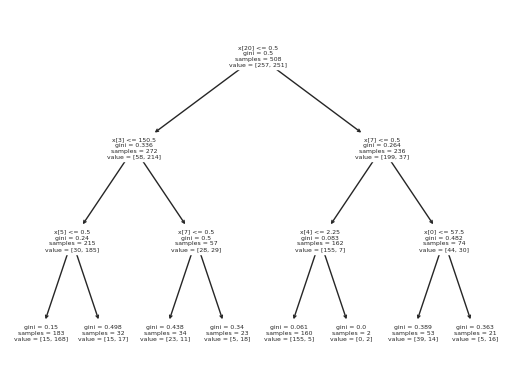

In [58]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(xTrain, yTrain)
p = tree.plot_tree(clf)

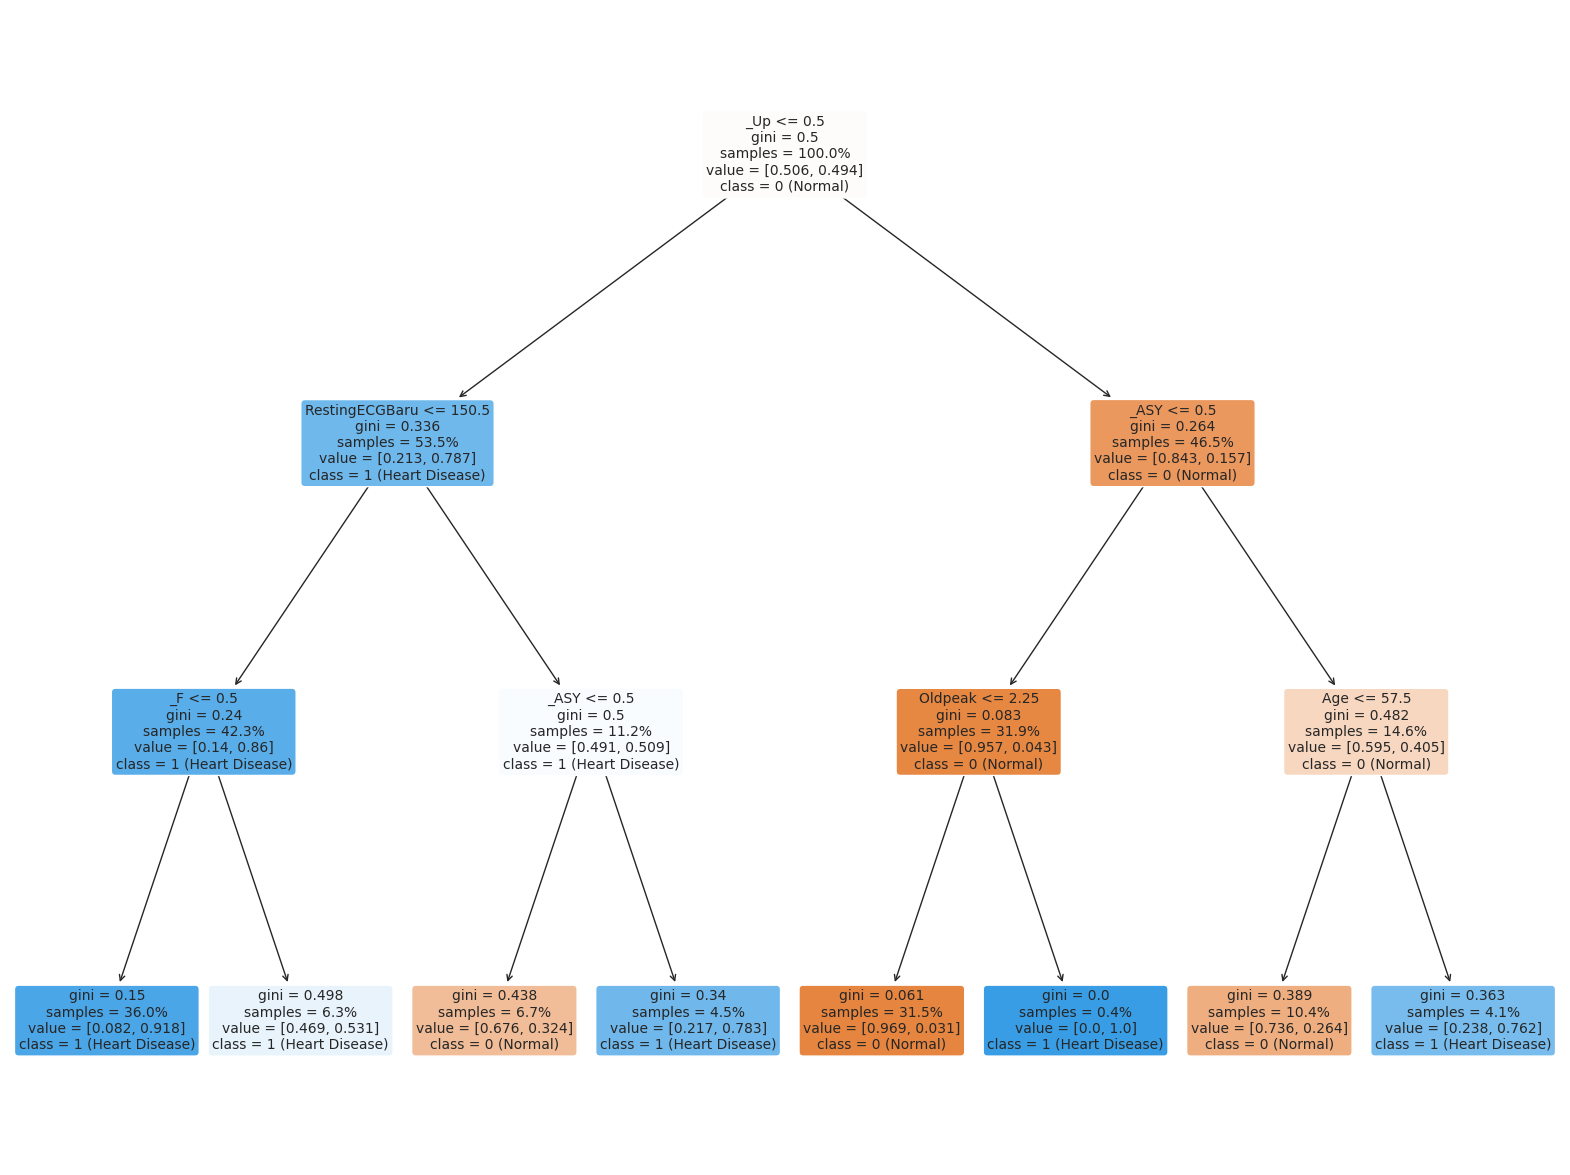

In [59]:
# Gambar yang lebih jelas
plt.figure(figsize=(20, 15))

tree.plot_tree(clf, feature_names=xTrain.columns, class_names=["0 (Normal)", "1 (Heart Disease)"], filled=True, rounded=True, fontsize=10, proportion=True)
plt.show()

Hasil plot di atas menunjukkan bagaimana model membuat keputusan berdasarkan fitur-fitur dalam data.

Fitur _Up yang nilainya kurang dari sama dengan 0.5
 dengan gini sebesar 0.5, sample 100%, value [0.506, 0.494] dan class = 0 (normal) memiliki dua cabang yaitu fitur RestingECGBaru yang nilainya kurang dari sama dengan 150.5 dan fitur _ASY yang nilainya kurang dari sama dengan 0.5.

In [60]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10)
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.78 (+/- 0.16), Waktu = 0.207 detik


Hasil akurasi model regresi logistik sebesar 78% dengan standar deviasi sebesar 0.16. Hal ini menunjukkan bahwa model mampu memprediksi data dengan 78% prediksi sesuai dengan nilai sebenarnya.

RegLog     0.763889
DecTree    0.652778
dtype: float64

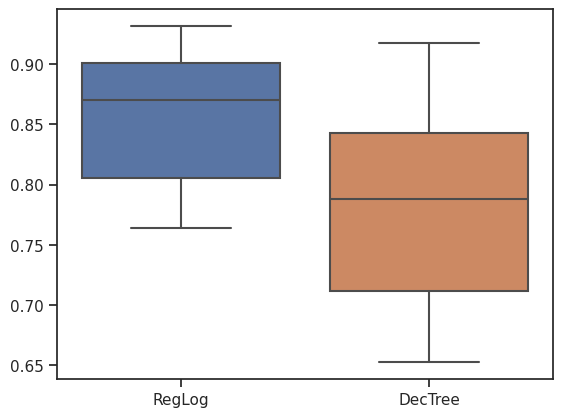

In [61]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

# **9. Mengevaluasi Hasil Pemodelan**

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn import linear_model

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [63]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8542613084837896
{'solver': 'lbfgs'}


Nilai sebesar 0.854 merupakan nilai terbaik dari metrik evaluasi model Regresi Logistik yang diukur selama proses Grid Search. Nilai ini menunjukkan sejauh mana model dengan kombinasi parameter tertentu dapat memprediksi dengan akurat.

Kombinasi parameter terbaik untuk model Regresi Logistik pada Grid Search yaitu parameter solver yang diatur sebagai lbfgs.

In [64]:
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [65]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8266274509803921
{'max_depth': 6, 'criterion': 'gini'}


Nilai 0.817 merupakan nilai terbaik dari metrik evaluasi model Decision Tree yang diukur selama proses Grid Search. ilai ini menunjukkan sejauh mana model dengan kombinasi parameter tertentu dapat memprediksi dengan akurat.

Kombinasi parameter terbaik model Decision Tree pada Grid Search yaitu parameter dengan maksimum kedalaman dari pohon keputusan sebesar 6 dan kriteria terbaik menggunakan gini.

Accuracy RL: 0.85 (+/- 0.11)
Accuracy DT: 0.80 (+/- 0.15)


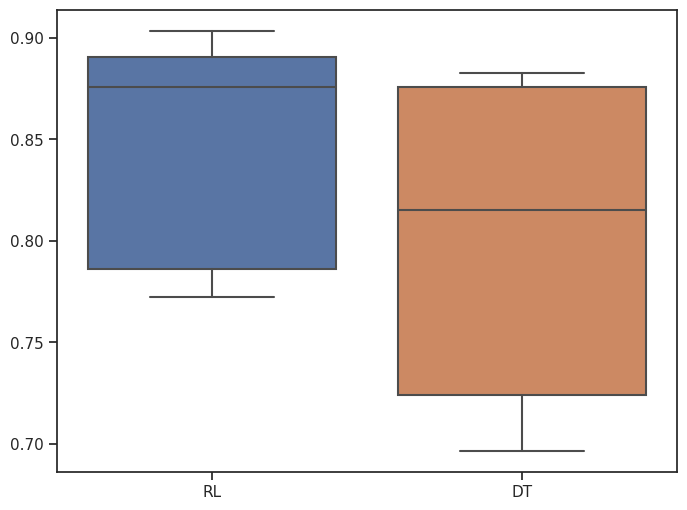

In [71]:
kCV = 5
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'lbfgs')
DT_opt = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

Setelah dilakukan cross validasi menggunakan parameter yang optimal, diperoleh akurasi model Regresi Logistik menjadi sebesar 85% dan akurasi model Decision Tree sebesar 80%.

# **Rekomendasi**
Diketahui bahwa ukuran keberhasilan pengembangan model klasifikasi dengan akurasi > 70%. Diperoleh dari hasil di atas bahwa akurasi model Regresi Logistik setelah dilakukan Cross Validasi sebesar 85% dan akurasi model Decision Tree sebesar 80%. Hal ini berarti bahwa model klasifikasi yang digunakan sudah memenuhi ukuran keberhasilan pengembangan model klasifikasi.

Rekomendasinya yaitu model Regresi Logistik dapat menjadi pilihan yang baik untuk melakukan prediksi/deteksi dengan cukup tepat terhadap pasien dengan penyakit jantung sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit kardiovaskuler.


# **Uji Coba Data Baru**

Input data baru yang ingin di prediksi dengan menggunakan model yang sudah dibuat

In [67]:
data_baru = {'Age': [30.0], 'Sex': ['F'], 'ChestPainType': ['ATA'], 'RestingBP': [130], 'Cholesterol': [240],'FastingBS': ['0'], 'MaxHRBaru': ['Normal'], 'RestingECGBaru': [172], 'ExerciseAngina': ['N'], 'Oldpeak': [1.0], 'ST_Slope': ['Flat'], 'HeartDisease': [0], '_M': [0], '_ASY': [0], '_NAP': [0], '_TA': [0], '_1': [0], '_LVH': [0],  '_ST': [0], '_Y': [0], '_Down': [0], '_Up': [0]}

df3 = pd.DataFrame(data_baru)

Transformasi data baru

In [68]:
for col in catVar.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(df3[col], prefix='')
        df3 = pd.concat([df3, transformasi], axis = 1)
        try:
            df3.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(df3.shape)
df3.head()

(1, 22)


,Age,RestingBP,Cholesterol,RestingECGBaru,Oldpeak,HeartDisease,_M,_ASY,_NAP,_TA,...,_ST,_Y,_Down,_Up,_F,_ATA,_0,_Normal,_N,_Flat
0,30.0,130,240,172,1.0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


### Prediksi menggunakan Model Regresi Logistik


In [69]:
# Prediktor untuk data baru
predictor_baru = df3.loc[:, ~df3.columns.isin(['HeartDisease'])]

# Mengurutkan variabel agar seperti pada urutan data Train model regresi logistik yang sudah dibuat
predictor_baru = predictor_baru[xTrain.columns]

# Melakukan prediksi dengan model yang sudah dilatih
prediksi_baru = reglog.predict(predictor_baru)

# Menampilkan hasil prediksi
print("Hasil Prediksi Regresi Logistik pada Data Baru:", prediksi_baru)

Hasil Prediksi Regresi Logistik pada Data Baru: [0]


Hasil prediksi pada data baru menggunakan model Regresi Logistik yaitu [0] artinya pada data baru, seseorang di prediksi normal (tidak memiliki penyakit jantung).

### Prediksi menggunakan Model Decision Tree

In [70]:
# Melakukan prediksi dengan model Decision Tree yang sudah dibuat
prediksi_DT_baru = DT.predict(predictor_baru)

# Menampilkan hasil prediksi
print("Hasil Prediksi Decision Tree pada Data Baru:", prediksi_DT_baru)

Hasil Prediksi Decision Tree pada Data Baru: [0]


Hasil prediksi pada data baru menggunakan model Decision Tree yaitu [0] artinya pada data baru, seseorang di prediksi normal (tidak memiliki penyakit jantung).